# Testing for vector plot

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys

### Declare Constants

In [2]:
PIXEL_SIZE = 0.0044
FRAME_RATE = 8000

### Define the function to plot the data

In [3]:
def vector(raw_data, location, save_path):
    # Import desired elements
    raw_data = raw_data.astype({'x':'int','y':'int','dx':'float','dy':'float'})
    data = raw_data.loc[:,['x','y','dx','dy']]

    # Round values to bin sizes
    data['x'] = data['x'].apply(lambda x: custom_round(x, base = 50))
    data['y'] = data['y'].apply(lambda y: custom_round(y, base = 50))

    # Organize data for plot
    data = data.groupby(['x','y']).mean()
    data = data.reset_index()
    
    # Adjust for pixel size and framerate
    data.x = (data.x) * PIXEL_SIZE
    data.y = (data.y * -1 + data.y.values.max()) * PIXEL_SIZE
    data.dx = data.dx * FRAME_RATE * PIXEL_SIZE
    data.dy = data.dy * FRAME_RATE * PIXEL_SIZE * -1

    # Create and label plot
    plt.figure(figsize = (12,10))
    plt.title(location, fontsize = 45)
    plt.quiver(data['x'],data['y'],data['dx'],data['dy'])
    plt.xlabel('x-distance (mm)', fontsize = 30)
    plt.ylabel('y-distance (mm)', fontsize = 30)
    
    # Save Plot
    try:
        plt.savefig(save_path)
    except:
        print("Unexpected error saving plot:", sys.exc_info())      

def custom_round(x, base=20):
    return int(base * round(float(x)/base)) #this sets the width of the bins


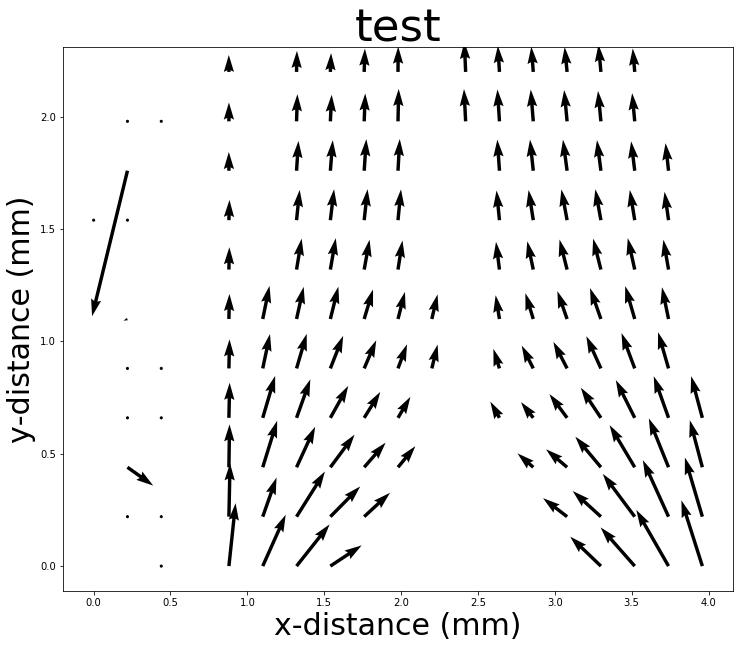

In [4]:
open_path = '/media/stian/Evan Dutch/Turbulence/2018-05-17/Film4/t1valuematrix.csv'
try:
    raw_data = pd.read_csv(open_path) #import a data set
    vector(raw_data,'test','/home/stian/Desktop/image.png')
except:
    print("Failed to open data for: " + open_path)


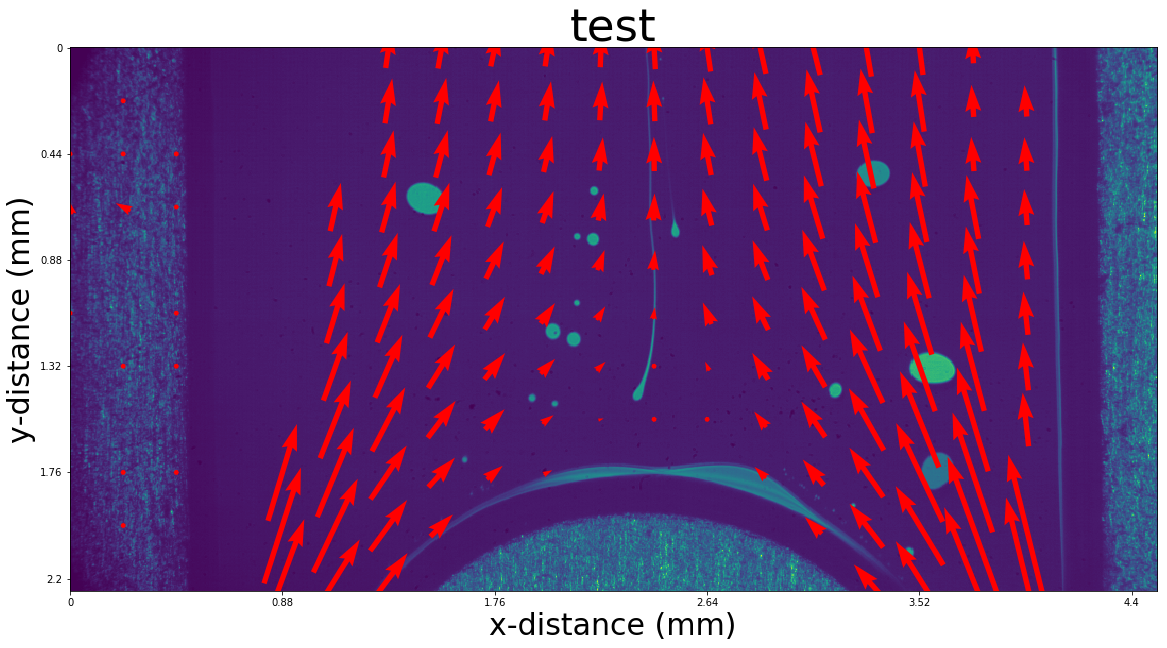

In [42]:
def vectorImage(raw_data, title, image):
    # Import desired elements
    raw_data = raw_data.astype({'x':'int','y':'int','dx':'float','dy':'float'})
    data = raw_data.loc[:,['x','y','dx','dy']]

    # Round values to bin sizes
    data['x'] = data['x'].apply(lambda x: custom_round(x, base = 50))
    data['y'] = data['y'].apply(lambda y: custom_round(y, base = 50))
    '''
    # Adjust for pixel size and framerate
    data.x = (data.x)# * PIXEL_SIZE
    data.y = (data.y * -1 + data.y.values.max()) #* PIXEL_SIZE
    data.dx = data.dx * FRAME_RATE #* PIXEL_SIZE
    data.dy = data.dy * FRAME_RATE * -1 # * PIXEL_SIZE * -1
    '''
    #data.dx = data.dx * -1
    #data.x = data.x * -1 + data.x.values.max() + 150
    data.dy = data.dy * -1
    # Organize data for plot
    data = data.groupby(['x','y']).mean()
    data = data.reset_index()
    
    #Plotting
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.imshow(img)
    plt.quiver(data['x'],data['y'],data['dx'],data['dy'],pivot='middle', color='red')
    
    
    plt.title(title, fontsize = 45)
    plt.xlabel('x-distance (mm)', fontsize = 30)
    plt.ylabel('y-distance (mm)', fontsize = 30)
    
    ticks_x = mpl.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x * PIXEL_SIZE))
    ax.xaxis.set_major_formatter(ticks_x)

    ticks_y = mpl.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x * PIXEL_SIZE))
    ax.yaxis.set_major_formatter(ticks_y)

    
path = '/media/stian/Evan Dutch/Turbulence/2018-05-21/Film1/1/1_02001.bmp'
img = mpl.image.imread(path)
# plt.imshow(img)
img_test_data = pd.read_csv('/media/stian/Evan Dutch/Turbulence/2018-05-21/Film1/t1valuematrix.csv')
vectorImage(img_test_data, 'test', img)





